In [19]:
# %% veri seti yükleme ve preporcessing
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import warnings 
warnings.filterwarnings("ignore")

#veri seti yukle
max_features = 10000 #en cok kullanilan 10 bin kelimeyi dikkate alalim
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words = max_features)

#veriyi padding ile ayni uzunlukta yapalim
maxlen = 100 # her yorumun uzunlugu 10 kelime ile sinirlandir
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)


In [23]:
# %% model create, compile and train
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = 64, input_length = maxlen))
    model.add(LSTM(units = 8))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation = "sigmoid")) # 2 sinif oldugu icin sigmoid kullanilir

    # derleme
    model.compile(optimizer = Adam(learning_rate = 0.0001),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

    return model

model = build_lstm_model()
model.summary()

# early stopping
early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 3, restore_best_weights = True)

#training
history = model.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_split = 0.2, callbacks = [early_stopping])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 117s 66ms/step - accuracy: 0.5606 - loss: 0.6869 - val_accuracy: 0.7708 - val_loss: 0.5720
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.7495 - loss: 0.5517 - val_accuracy: 0.8140 - val_loss: 0.4871
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8297 - loss: 0.4630 - val_accuracy: 0.8256 - val_loss: 0.4339
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 93ms/step - accuracy: 0.8788 - loss: 0.3883 - val_accuracy: 0.8178 - val_loss: 0.4229
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.8973 - loss: 0.3391 - val_accuracy: 0.8206 - val_loss: 0.4022
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 74ms/step - accuracy: 0.9154 - loss: 0.2927 - val_accuracy: 0.8300 - val_loss: 0.3872
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.9226 - loss: 0.2690 - val_accuracy: 0.8330 - val_loss: 0.3896
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.9337

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8254 - loss: 0.4049
Test loss: 0.40049171447753906, test accuracy: 0.8281199932098389


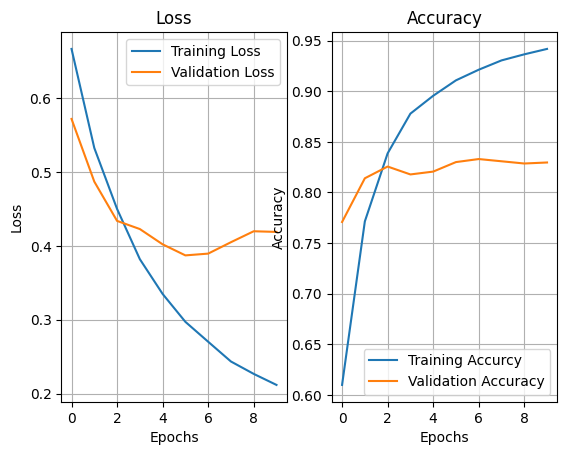

In [29]:
#%% model test ve evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, test accuracy: {accuracy}")

plt.figure()

# loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label = "Training Accurcy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()